<a href="https://colab.research.google.com/github/prestasicode/ecommerce_scraping/blob/main/scraping_shopee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [ ]:
import re
import json
import requests
import csv

Write File

In [ ]:
f = csv.writer(open('shopee-review.csv', 'w', newline=''))
f.writerow(['Username', 'Review'])

17

### Define url
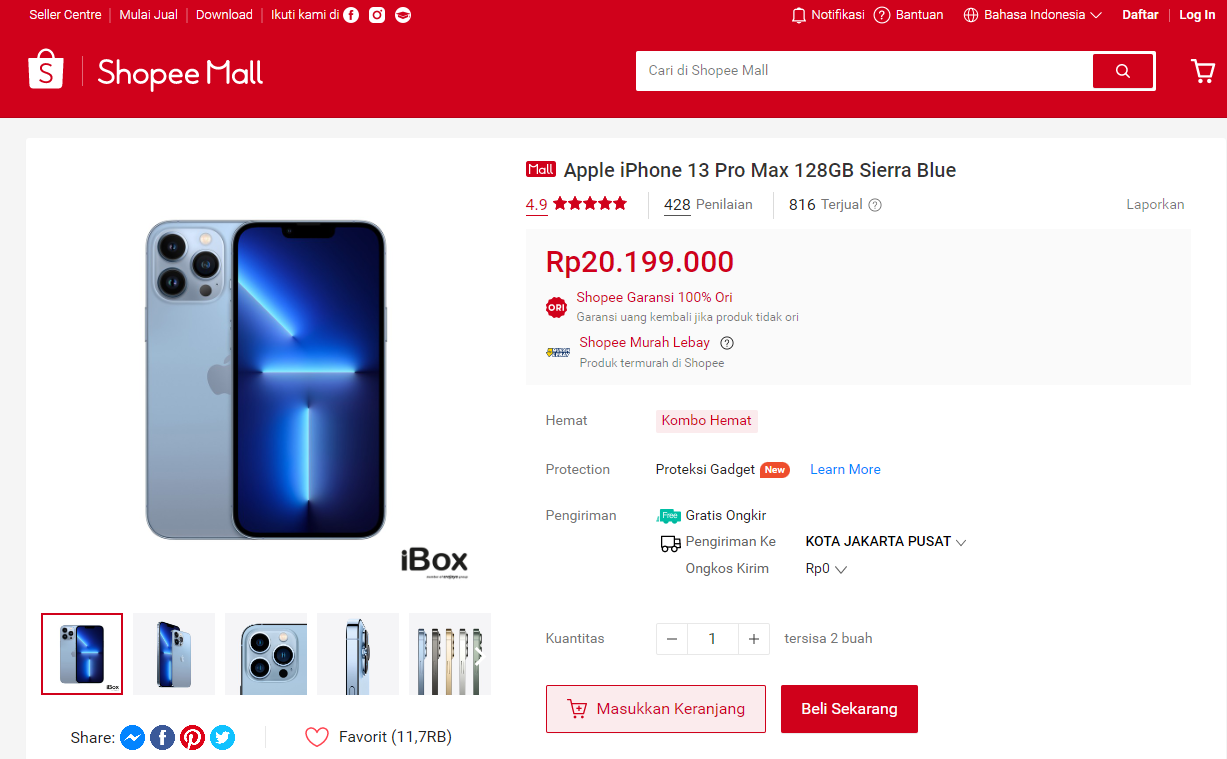

In [ ]:
url = 'https://shopee.co.id/Apple-iPhone-13-128GB-Midnight-i.241308147.10164871790?sp_atk=de1fd43b-8e21-4dbf-8706-044471340382&xptdk=de1fd43b-8e21-4dbf-8706-044471340382'

In [ ]:
r = re.search(r'i\.(\d+)\.(\d+)', url)
shop_id, item_id = r[1], r[2]
ratings_url = 'https://shopee.co.id/api/v2/item/get_ratings?filter=0&flag=1&itemid={item_id}&limit=20&offset={offset}&shopid={shop_id}&type=0'

offset = 0
while True:

    data = requests.get(ratings_url.format(shop_id=shop_id, item_id=item_id, offset=offset)).json()

    # uncomment this to print all data:
    # print(json.dumps(data, indent=4))

    i = 1
    
    for i, rating in enumerate(data['data']['ratings'], 1):
        user = rating['author_username']
        comment = rating['comment']

        f.writerow([user, comment])

    if i % 20:
        break

    offset += 20